# Walmart:Customer Purchase Behavior
**Business Statement:**

Analyzing the customers purchase behavior against the customer's gender based on various factors like purchase amount,age,occupation,marital status,etc.

# Packages

In [100]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
data_tran=pd.read_csv("/content/walmart_data.txt")

# 1.1 - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [102]:
data_tran.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 1.1.1 - Shape of the data

In [103]:
print("Shape of the data:",data_tran.shape)

Shape of the data: (550068, 10)


# 1.1.2 - Data type as well as other things like memory usage

In [104]:
print(data_tran.info()) # data types as well as other information like memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


42 MB memory has been taken by the dataset

# 1.1.3 - Convert a column into a categorical column if possible

In [105]:
# convert some columns to categorical column
# the advantage of converting a column(if possible) into a categorical column
# will reduce the substancial amount of memory usage,this can be very much helpful if the 
# dataset is very huge
# convert all the columns except column Purchase into categorical columns

for col in data_tran.columns[:-1]:
  data_tran[col]=data_tran[col].astype("category")

# Now again print the information about the data,this time meory will be reduced
# substancial amount
data_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


Here only 10.3 MB memory usage. Almost 4 times less memory usage.This proves converting columns into categorical columns(if possible) will reduce the substancial amount of memory usage

# 1.1.4 - Statistical Summary

In [106]:
data_tran.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


The mean and median(50% quantile) of **Purchase** are not same.There is a significant difference.For example **mean** is 9263.96 whereas **median** is 8047.This indicates Purchase column as a whole seems to have outliers.

Range of **Purchase** is 12.0 to 23961

# 1.2 - Non-Graphical Analysis: Value counts and unique attributes ​

# 1.2.1 - Value counts

In [107]:
for col in data_tran.columns:
  print(f"Value counts of the column {col}:\n")
  print(data_tran[col].value_counts())
  print()

Value counts of the column User_ID:

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

Value counts of the column Product_ID:

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64

Value counts of the column Gender:

M    414259
F    135809
Name: Gender, dtype: int64

Value counts of the column Age:

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Value counts of the column Occupation:

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     

# 1.2.2 - Unique Attributes

In [108]:
d={}
for col in data_tran.columns:
  d[col]=data_tran[col].nunique()
df=pd.DataFrame(d,index=["No. of unique values"])
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
No. of unique values,5891,3631,2,7,21,3,5,2,20,18105


There are 550068 records ,no attributes are unique

# Range of the attributes

In [109]:
for col in data_tran.columns[2:-1]:
  print(f"{col} has the following values:\n")
  print(data_tran[col].unique())
  print()


Gender has the following values:

['F', 'M']
Categories (2, object): ['F', 'M']

Age has the following values:

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

Occupation has the following values:

[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]

City_Category has the following values:

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

Stay_In_Current_City_Years has the following values:

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

Marital_Status has the following values:

[0, 1]
Categories (2, int64): [0, 1]

Product_Category has the following values:

[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]



# Missing values and outlier detection

In [110]:
data_tran.isna().sum() # detect missing values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no missing values

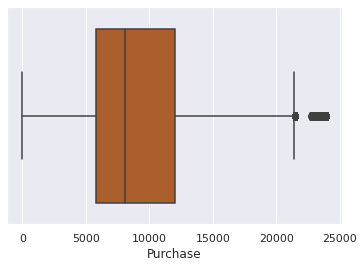

In [111]:
# outliet detection in Purchase column
sns.boxplot(x='Purchase',data=data_tran)

  There are a few outliers in the **Purchase** attribute.

# Outlier in Purchase column against male and female

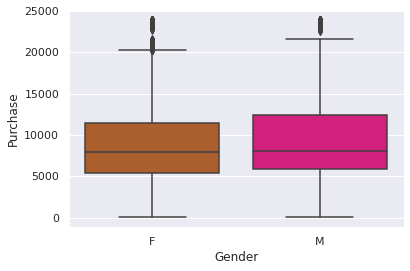

In [112]:
sns.boxplot(x='Gender',y='Purchase',data=data_tran)

**Female** spendings have more outliers than **male** spendings.

# Outliers against age category

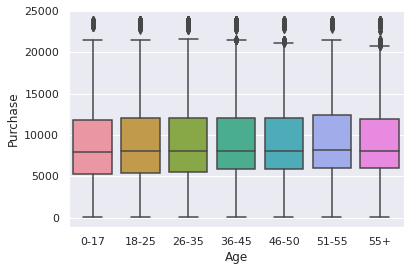

In [113]:
sns.boxplot(x='Age',y='Purchase',data=data_tran)

Every age category seems to have outliers.

# 1.3 - Visual Analysis - Univariate & Bivariate

# Number of female and male transactions

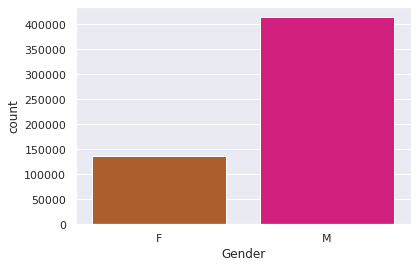

In [114]:
sns.countplot(x='Gender',data=data_tran)

Number of male transactions is way more than the number of female transactions.More than two times of female transaction is male transactions. 

# number of married and unmarried

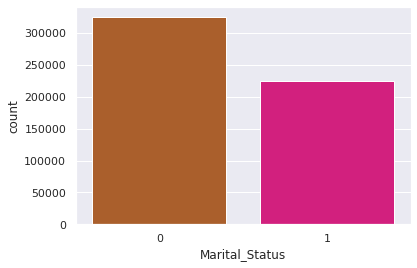

In [115]:
sns.countplot(x='Marital_Status',data=data_tran)

Unmarried customers visited Walmart stores in bulk numbers than married customers.

# Distribution plot for Male and Female

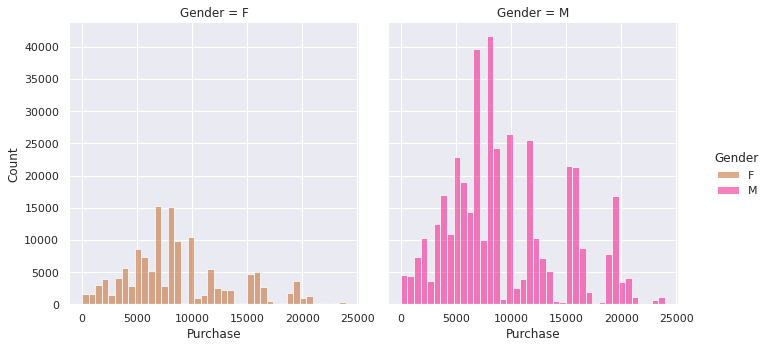

In [116]:
sns.set_theme(palette="Accent_r")
sns.displot(data=data_tran,x='Purchase',hue='Gender',kind='hist',col='Gender',bins=40)


The **males** outnumbered **females** in spending.For example  people who have spend between 5000 and 10000 are most males.

Conclusion:In overall **males** spending more than **females**

# Distribution plot based on age category for male and female

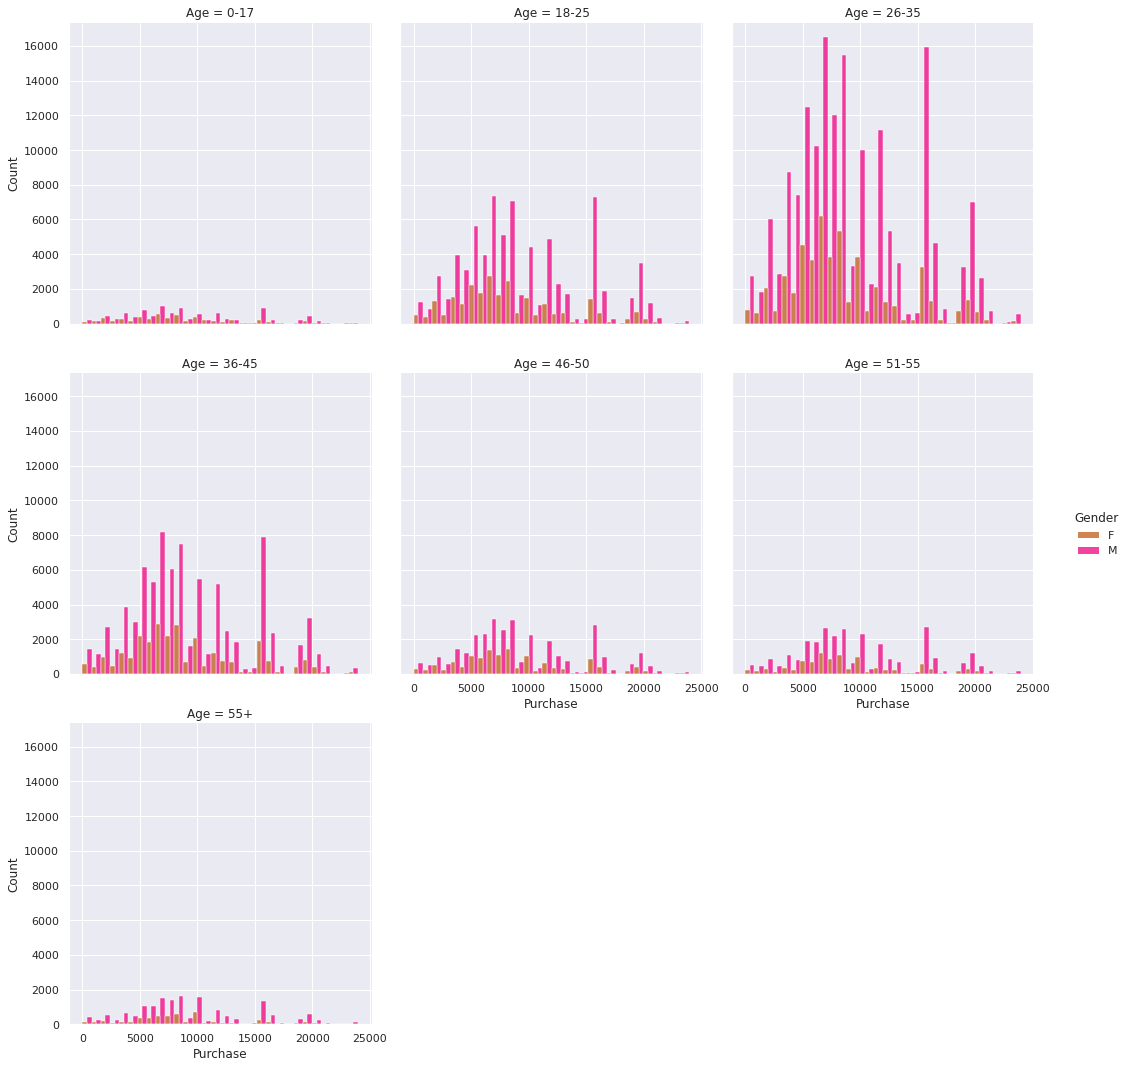

In [117]:
sns.set_theme(palette='Accent_r')
sns.displot(data=data_tran,x='Purchase',hue='Gender',kind='hist',col='Age',col_wrap=3,bins=30,
            multiple='dodge')


In almost all age category **males** outnumbered **females** in spending.In particular customers belong to age range from 51 to 55 spending more than any another age range.In this case **male** outnumbered **female**.

# Distribution plot for married and unmarried

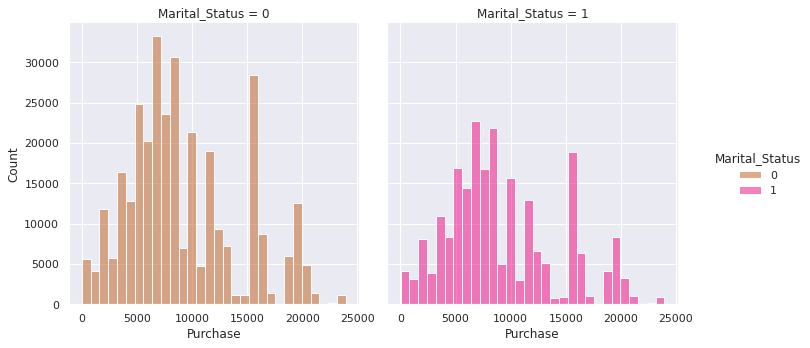

In [118]:
sns.displot(x='Purchase',hue='Marital_Status',data=data_tran,col='Marital_Status',bins=30)

It's very strange that unmarried people spending more than married people.

# Distribution plot for male and female against marital status

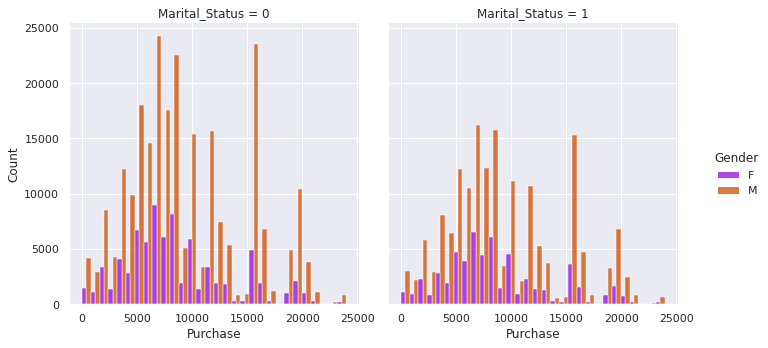

In [119]:
sns.displot(x='Purchase',hue='Gender',col='Marital_Status',data=data_tran,palette='gnuplot',bins=30,multiple='dodge')

Unmarried male happens to spend more than married male.There is not much significant difference between married females vs unmarried females.Still unmarried females spending a little over money than married females.

# Histogram plot for the **Purchase** column

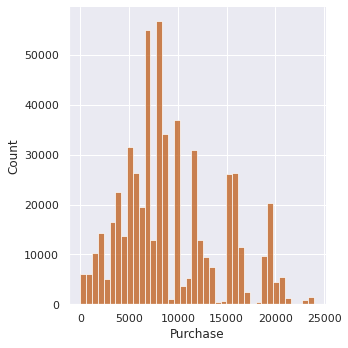

In [120]:
sns.displot(x='Purchase',kind='hist',data=data_tran,palette='deep',bins=40)

There is a peak around 8000.This distribution is not unimodal that is it has more than one peak.

# Spending nature per city(On average)

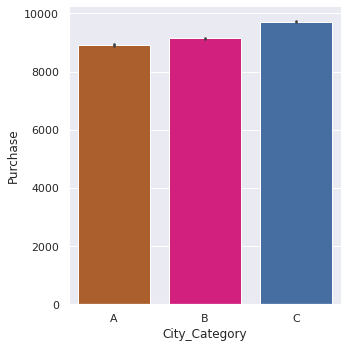

In [121]:
sns.catplot(x='City_Category',y='Purchase',data=data_tran,kind='bar',estimator=np.mean)

Customers from city **C** happend to spend more on average than city citites.

# Count plot for Product Category

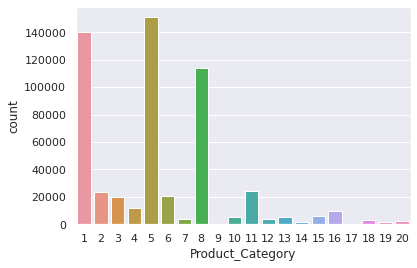

In [122]:
sns.countplot(x='Product_Category',data=data_tran)

Majority products belong to category 1,5,and 8.Total is more than 4 lakhs which is more than 70% of the total transactions(550068).

Conclusion: These product categories are more famous than other categories.

# Count plot for Product Category agains male and female

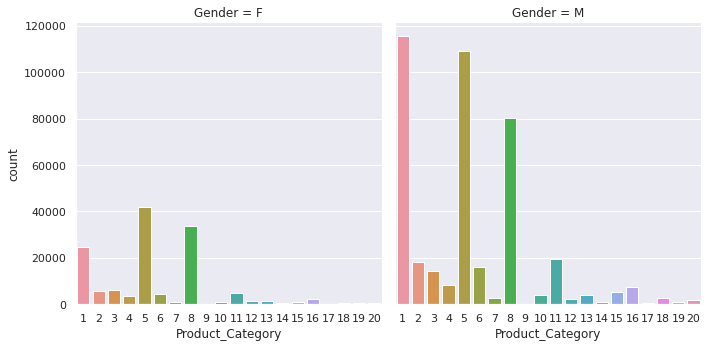

In [123]:
sns.catplot(x='Product_Category',col='Gender',data=data_tran,kind='count')

Product categories 1,5,and 8 are more famous to males as well as females.But these product categories are way more famous in male camp than female.

# Barplot for male and female with mean estimator and confidence interval using bootstrapping:

This is using seaborn ,later will explicitly find confidence intervals

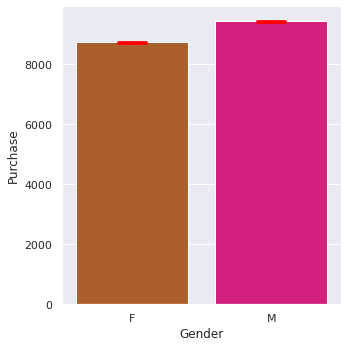

In [124]:
sns.catplot(x='Gender',y='Purchase',data=data_tran,ci=95,errcolor='red',estimator=np.mean,kind='bar',
            capsize=0.2) # 95% boostrap confidence interval
                         # around average spending for male and female

The average female spending per transaction is slighly less than the average male spending.

The bootstrap confidence interval around mean for both male and female seems to be very much narrow.

Nevertheless,will explicitly find condfidence interval around mean.

# Barplot along with bootstrap 95% confidence interval around mean for each age category.

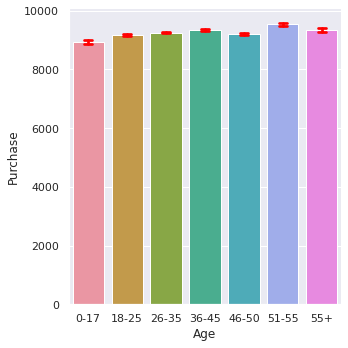

In [125]:
sns.catplot(x='Age',y='Purchase',data=data_tran,ci=95,errcolor='red',estimator=np.mean,kind='bar',
            capsize=0.2) 

Age category 0-17 and 55+ seems to have a wider confidence interval compared to others.

Nevertheless will find confidence intervals explicitly later. 

# Barplot of mean for maried vs unmarried.

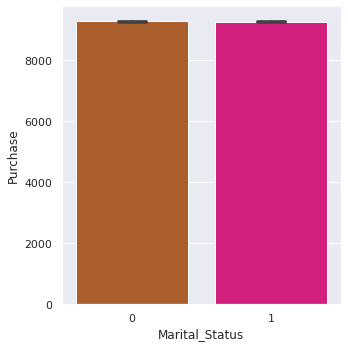

In [126]:
sns.catplot(x='Marital_Status',y='Purchase',data=data_tran,
            ci=95,kind='bar',estimator=np.mean,capsize=0.2) # 95% bootstrap confidence interval around mean 

Bootstrap confidence interval seems to be very much narrow for both married and unmarried.

Nevertheless will construct them explicitly.

# Constructing bootstraped confidence interval for male and female

In [127]:
male_mean=np.mean(data_tran[data_tran['Gender']=='M'].Purchase)
female_mean=np.mean(data_tran[data_tran['Gender']=='F'].Purchase)
print("Avergae spending per transaction for male is ",male_mean)
print()
print("Avergae spending per transaction for female is ",female_mean)


Avergae spending per transaction for male is  9437.526040472265

Avergae spending per transaction for female is  8734.565765155476


Conclusion: The average spending per transaction for female is little less than the average male spending.

Nevertheless the difference in average spending amongst male and female is not much significant.

On average still male spending more per transaction than female does.

In [128]:
def construct_confidence_interval(n_sim,sample_size,data,ci=95):
  # by default 95% confidence interval
  boots_mean=[]
  for _ in range(n_sim):
    boot_sample=np.random.choice(data,size=sample_size,replace=True)
    boots_mean.append(np.mean(boot_sample))
  
  # calculate the confidence interval
  conf=np.percentile(boots_mean,[(100-ci)/2, ci+((100-ci)/2)])
  return list(conf)



# confidence for female spending:Around population mean

In [129]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000,50000,100000] # different different sample sizes 
data=data_tran[data_tran['Gender']=='F'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for female spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df
  

95% confidence interval for female spending:



,sample size,CI
0,30,"[7096.71, 10515.97]"
1,100,"[7822.28, 9684.35]"
2,1000,"[8440.93, 9033.03]"
3,10000,"[8643.26, 8827.12]"
4,30000,"[8679.8, 8789.9]"
5,50000,"[8693.41, 8776.72]"
6,100000,"[8705.52, 8764.84]"


As sample size increasing the confidence intervals become narrower and narrower.

with **100** samples confidence interval is not much of use as it is much wider.

With **1000** samples the confidence interval seems to be reliable.

In [130]:
intervals=[]
ci=99 # 99% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("99% confidence interval for female spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

99% confidence interval for female spending:



,sample size,CI
0,30,"[6609.27, 11057.87]"
1,100,"[7532.47, 9995.36]"
2,1000,"[8339.17, 9112.79]"
3,10000,"[8611.44, 8861.07]"
4,30000,"[8663.28, 8804.47]"
5,50000,"[8681.66, 8789.4]"
6,100000,"[8696.22, 8773.34]"


As sample size is increasing the 90% and 95% confidence intervals are becoming more and more identical.

In [131]:
intervals=[]
ci=90 # 90% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("90% confidence interval for female spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

90% confidence interval for female spending:



,sample size,CI
0,30,"[7307.57, 10219.32]"
1,100,"[7954.87, 9531.82]"
2,1000,"[8491.63, 8982.01]"
3,10000,"[8657.16, 8812.27]"
4,30000,"[8689.2, 8780.52]"
5,50000,"[8698.59, 8769.42]"
6,100000,"[8709.32, 8759.06]"


As sample size is increasing the 90%,95% and 99% confidence intervals are becoming more and more identical.

In [132]:
# calculate average spending of each female customer
avg_spending=data_tran[data_tran['Gender']=='F'].groupby('User_ID')['Purchase'].mean()

# get the minimum avergae spending and maximum average spending
print("Minimum average spending: ",avg_spending.min()) 
print("Maximum average spending: ",avg_spending.max()) 


Minimum average spending:  3599.733333333333
Maximum average spending:  18490.166666666668


With keeping in mind the minimum and maximum average spending of female customers ,we can select 95% confidence interval(**[8441.75, 9026.34]**) with sample size 1000 as a worthy candidate.

# Confidence interval for male spending

In [133]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000,50000,100000] # different different sample sizes 
data=data_tran[data_tran['Gender']=='M'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for male spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df
  

95% confidence interval for male spending:



,sample size,CI
0,30,"[7683.1, 11282.64]"
1,100,"[8456.58, 10452.78]"
2,1000,"[9125.27, 9756.72]"
3,10000,"[9336.46, 9539.07]"
4,30000,"[9379.59, 9495.39]"
5,50000,"[9393.81, 9482.32]"
6,100000,"[9405.93, 9469.42]"


In [134]:
intervals=[]
ci=99 # 99% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("99% confidence interval for male spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

99% confidence interval for male spending:



,sample size,CI
0,30,"[7211.49, 11955.68]"
1,100,"[8157.0, 10780.83]"
2,1000,"[9040.85, 9854.07]"
3,10000,"[9306.64, 9567.49]"
4,30000,"[9359.43, 9511.57]"
5,50000,"[9379.04, 9494.88]"
6,100000,"[9396.02, 9477.17]"


In [135]:
intervals=[]
ci=90 # 90% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("90% confidence interval for male spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

90% confidence interval for male spending:



,sample size,CI
0,30,"[7961.52, 10959.01]"
1,100,"[8604.42, 10275.25]"
2,1000,"[9170.74, 9700.77]"
3,10000,"[9354.06, 9520.55]"
4,30000,"[9388.5, 9486.54]"
5,50000,"[9399.46, 9474.64]"
6,100000,"[9410.97, 9464.47]"


In [136]:
# calculate average spending of each male customer
avg_spending=data_tran[data_tran['Gender']=='M'].groupby('User_ID')['Purchase'].mean()

# get the minimum avergae spending and maximum average spending
print("Minimum average spending: ",avg_spending.min()) 
print("Maximum average spending: ",avg_spending.max()) 


Minimum average spending:  2318.733333333333
Maximum average spending:  18577.893617021276


Interestingly the minimum average(**2318**) spending of a male customer is little less than the minimum average(**3599**) spending of a female customer .

Maximum average spending is almost same for both a male and female.


This way we can draw another conclusion that on average a female customer spends a minimum of **3599** dollars whereas a male customer spending  a minimum of **2318** dollars.

So in this perspective female are more oriented towards shopping.




Interestingly with sample size 1000 both the male and the female 95% confidence intervals are not overlapping at all.

**Male confidence interval(95%):** [9114.96, 9747.34]

**Female confidence interval(95%):** [8441.75, 9026.34]



Also male happens to spend more on average than a female customer does.


**Conclusion:** On average male spending more than female 

**Women are not spending more than men**

Reason:

1. Men spending more on average

2. Spending confidence interval for men is [9114.96, 9747.34] whereas confidence interval for women is [8441.75, 9026.34]

# Confidence interval for married customers

In [137]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000,50000,100000] # different different sample sizes 
data=data_tran[data_tran['Marital_Status']==1].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for married customers's spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df
  

95% confidence interval for married customers's spending:



,sample size,CI
0,30,"[7552.28, 11113.97]"
1,100,"[8289.44, 10256.0]"
2,1000,"[8952.24, 9567.01]"
3,10000,"[9162.19, 9358.05]"
4,30000,"[9206.28, 9317.66]"
5,50000,"[9216.56, 9305.4]"
6,100000,"[9229.91, 9291.62]"


With 1000 samples ,the 95% confidence interval is **[8949.88, 9577.5]** which is not bad.

In [138]:
intervals=[]
ci=99 # 99% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("99% confidence interval for married customers's spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

99% confidence interval for married customers's spending:



,sample size,CI
0,30,"[7098.73, 11759.03]"
1,100,"[8036.42, 10542.52]"
2,1000,"[8861.52, 9672.79]"
3,10000,"[9133.89, 9385.96]"
4,30000,"[9189.58, 9336.11]"
5,50000,"[9203.4, 9319.63]"
6,100000,"[9219.75, 9302.35]"


With 1000 samples the 99% confidence interval is **[8865.55, 9679.69]**

In [139]:
intervals=[]
ci=90 # 90% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("90% confidence interval for married customers's spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

90% confidence interval for married customers's spending:



,sample size,CI
0,30,"[7793.34, 10797.7]"
1,100,"[8448.92, 10098.21]"
2,1000,"[9005.79, 9516.49]"
3,10000,"[9179.2, 9343.47]"
4,30000,"[9213.73, 9308.88]"
5,50000,"[9224.18, 9299.12]"
6,100000,"[9235.24, 9286.41]"


With 1000 samples 90% confidence interval is **[9003.21, 9519.72]**

With 1000 samples ,the 95%,99% ,and 90% confidence intervals are [8949.88, 9577.5],[8865.55, 9679.69],[9003.21, 9519.72] respectively.



# Confidence interval for unmarried customers spending

In [140]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000,50000,100000] # different different sample sizes 
data=data_tran[data_tran['Marital_Status']==0].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for married customers's spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for married customers's spending:



,sample size,CI
0,30,"[7551.24, 11106.94]"
1,100,"[8293.34, 10280.18]"
2,1000,"[8960.99, 9579.68]"
3,10000,"[9166.44, 9362.76]"
4,30000,"[9208.71, 9322.65]"
5,50000,"[9223.26, 9309.75]"
6,100000,"[9234.66, 9297.48]"


With 1000	samples the 95% confidence interval is [8956.61, 9584.18]

In [141]:
intervals=[]
ci=99 # 99% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("99% confidence interval for married customers's spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

99% confidence interval for married customers's spending:



,sample size,CI
0,30,"[7076.98, 11731.8]"
1,100,"[7975.77, 10592.05]"
2,1000,"[8859.93, 9675.35]"
3,10000,"[9141.65, 9396.37]"
4,30000,"[9193.26, 9343.07]"
5,50000,"[9205.59, 9324.85]"
6,100000,"[9226.34, 9308.5]"


With 1000	samples the 99% confidence interval is [8858.94, 9679.09]

In [142]:
intervals=[]
ci=90 # 90% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=ci)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("90% confidence interval for married customers's spending:\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

90% confidence interval for married customers's spending:



,sample size,CI
0,30,"[7806.45, 10785.24]"
1,100,"[8447.01, 10081.7]"
2,1000,"[9009.54, 9527.03]"
3,10000,"[9183.03, 9348.56]"
4,30000,"[9217.39, 9314.51]"
5,50000,"[9228.77, 9303.27]"
6,100000,"[9240.24, 9291.78]"


With 1000 samples the 90% confidence interval is [9005.89, 9530.48]

With 1000 samples ,the 95%,99% ,and 90% confidence intervals are [8956.61, 9584.18],[8858.94, 9679.09],[9005.89, 9530.48] respectively.



**Conclusion:** If we consider 95% confidence interval then the intervals are overlapping.

 **married:** [8949.88, 9577.5] 
 
 **Unmarried:** [8956.61, 9584.18]

 They are almost identical that is spending nature of married customers and unmarried customers are almost same.

 Those who are married should have been more active on **Black Friday**  as they are more responsible towards family but on the contray this is not the case.Unmarried customers seems to be in par with married customers in responsibility,shopping,etc.

# confidence intervals for all age category

# Mean for each age category

In [143]:
data_tran.groupby('Age')['Purchase'].mean().sort_values()

Age
0-17     8933.464640
18-25    9169.663606
46-50    9208.625697
26-35    9252.690633
36-45    9331.350695
55+      9336.280459
51-55    9534.808031
Name: Purchase, dtype: float64

In [144]:
# number of married and unmarried customers in each age range
data=data_tran.groupby(['Age','Marital_Status'])['User_ID'].count().reset_index()
data.columns=['Age','Marital_Status','Count']
data

,Age,Marital_Status,Count
0,0-17,0,15102
1,0-17,1,0
2,18-25,0,78544
3,18-25,1,21116
4,26-35,0,133296
5,26-35,1,86291
6,36-45,0,66377
7,36-45,1,43636
8,46-50,0,12690
9,46-50,1,33011


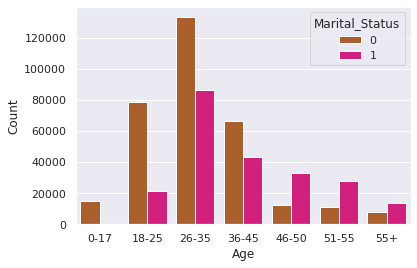

In [145]:
sns.barplot(x='Age',y='Count',hue='Marital_Status',data=data)

Customers in the age range 51-55 on average spends more than any other range.

Customers in the age range 0-17 on average spends 8933 dollars which is the lowest.

**Conlsuion:** 0-17 age range customers are not married ,so they have less family burden than other customers belong to different age group. 

In [146]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000,50000,100000] # different different sample sizes, for age:26-35  which has around 2
                                                    # lakh customers
data=data_tran[data_tran['Age']=='26-35'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for spending by customers belong to the age group 26-35 :\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for spending by customers belong to the age group 26-35 :



,sample size,CI
0,30,"[7472.71, 11056.47]"
1,100,"[8276.67, 10247.01]"
2,1000,"[8944.37, 9561.68]"
3,10000,"[9152.7, 9349.53]"
4,30000,"[9196.27, 9310.47]"
5,50000,"[9208.87, 9297.08]"
6,100000,"[9221.48, 9284.23]"


Customers in the age group 26-35 with 1000 samples the 95% confidence interval is [8943.88, 9563.55]

In [147]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000,50000] # different different sample sizes, for age:36-45  which has around 1
                                                    # lakh customers
data=data_tran[data_tran['Age']=='36-45'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for spending by customers belong to the age group 36-45 :\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for spending by customers belong to the age group 36-45 :



,sample size,CI
0,30,"[7636.83, 11181.4]"
1,100,"[8364.74, 10315.35]"
2,1000,"[9021.58, 9645.37]"
3,10000,"[9233.22, 9429.74]"
4,30000,"[9274.23, 9387.44]"
5,50000,"[9287.31, 9375.69]"


Customers in the age group 36-45 with 1000 samples the 95% confidence interval is [9021.32, 9648.72]



In [148]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000,50000] # different different sample sizes, for age:18-25  which has around 1
                                                    # lakh customers
data=data_tran[data_tran['Age']=='18-25'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for spending by customers belong to the age group 18-25 :\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for spending by customers belong to the age group 18-25 :



,sample size,CI
0,30,"[7406.52, 11025.01]"
1,100,"[8213.39, 10188.03]"
2,1000,"[8854.19, 9474.36]"
3,10000,"[9070.65, 9269.55]"
4,30000,"[9113.63, 9225.32]"
5,50000,"[9125.14, 9213.61]"


Customers in the age group 18-25 with 1000 samples the 95% confidence interval is [8858.76, 9478.65]

In [149]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,30000] # different different sample sizes, for age:46-50  which has around 40
                                                    # thousands customers
data=data_tran[data_tran['Age']=='46-50'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for spending by customers belong to the age group 46-50 :\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for spending by customers belong to the age group 46-50 :



,sample size,CI
0,30,"[7546.14, 11029.95]"
1,100,"[8244.64, 10194.67]"
2,1000,"[8894.5, 9520.95]"
3,10000,"[9111.08, 9305.98]"
4,30000,"[9152.49, 9265.57]"


Customers in the age group 46-50 with 1000 samples the 95% :
confidence interval is [8903.42, 9522.41]

In [150]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,20000] # different different sample sizes, for age:51-55  which has around 40
                                                    # thousands customers
data=data_tran[data_tran['Age']=='51-55'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for spending by customers belong to the age group 51-55 :\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for spending by customers belong to the age group 51-55 :



,sample size,CI
0,30,"[7765.36, 11402.98]"
1,100,"[8565.87, 10534.76]"
2,1000,"[9228.51, 9856.74]"
3,10000,"[9435.35, 9632.5]"
4,20000,"[9465.51, 9604.59]"


Customers in the age group 51-55 with 1000 samples the 95% 
confidence interval is [9226.18, 9859.68]




In [151]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,10000,15000] # different different sample sizes, for age:55+  which has around 20
                                                    # thousands customers
data=data_tran[data_tran['Age']=='55+'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for spending by customers belong to the age group 55+ :\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for spending by customers belong to the age group 55+ :



,sample size,CI
0,30,"[7603.19, 11135.99]"
1,100,"[8378.25, 10345.69]"
2,1000,"[9031.56, 9643.53]"
3,10000,"[9238.73, 9433.12]"
4,15000,"[9255.57, 9415.78]"


Customers in the age group 55+ with 1000 samples the 95% 
confidence interval is [9020.52, 9649.17]




In [152]:
n_sim=10000 # number of simulations
sample_sizes=[30,100,1000,5000,10000] # different different sample sizes, for age:0-17  which has around 15
                                                    # thousands customers
data=data_tran[data_tran['Age']=='0-17'].Purchase
intervals=[]
ci=95 # 95% confidence interval
for sample_size in sample_sizes:
  interval=construct_confidence_interval(n_sim,sample_size,data,ci=95)
  intervals.append([round(interval[0],2),round(interval[1],2)])
print("95% confidence interval for spending by customers belong to the age group 0-17 :\n")
df=pd.DataFrame({'sample size':sample_sizes,'CI':intervals})
df

95% confidence interval for spending by customers belong to the age group 0-17 :



,sample size,CI
0,30,"[7162.12, 10792.79]"
1,100,"[7931.97, 9949.64]"
2,1000,"[8621.05, 9249.24]"
3,5000,"[8793.02, 9075.95]"
4,10000,"[8834.67, 9034.22]"


Customers in the age group 0-17 with 1000 samples the 95% 
confidence interval is [8618.78, 9249.09]

**Conclusion:** The 95% confidence intervals all the age category more or less overlapping.

And more or less every customer spending from 8800 dollars to 9800 dollars on average.


Nevertheless customers belonging to age group 51-55 happens to spend more money on average than any other age category customers

Age group 51-55 happens to spend on average maximum of 9859.68 dollars.

# Recommendation:


1.  Store more products of category 1,5,and 8 for both men and women on Black Friday.

2.  Store more men related products.




3. Customers in the age range 51-55 are valuable customers as they are in heighest spending customers on average.

4. 95% confidence interval for married and unmarried are [8949.88, 9577.5] and [8956.61, 9584.18] respectively.They are almost identical but number of unmarried customers outnumbered married one.**So,we should pay more focus towards unmmarried customers.**

5. Walmart should store more products for city **C** customers.